# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import scipy

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [3]:
# Your code here
x= np.random.normal(50 , 5, size=[10])
y= np.random.normal(50 , 5, size=[50])
z= np.random.normal(50 , 5, size=[500])
w= np.random.normal(50 , 5, size=[5000])

a = np.concatenate((x, y, z, w))
k2, p = stats.normaltest(a)
alpha = 1e-3
print("p = {:g}".format(p))
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0.155287
The null hypothesis cannot be rejected


#### Interpret the normaltest results and make your observations.

In [4]:
## The null hypothesis can be rejected because the "p" value is < than alpha (arbitrarily imposed), 
## whereby the result is statistically significant

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([   7.,   28.,  156.,  565., 1274., 1482.,  975.,  406.,   89.,
          18.]),
 array([29.94113779, 33.70573424, 37.47033069, 41.23492714, 44.99952359,
        48.76412003, 52.52871648, 56.29331293, 60.05790938, 63.82250583,
        67.58710227]),
 <a list of 10 Patch objects>)

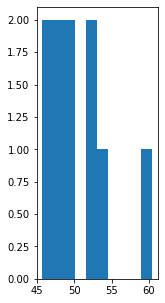

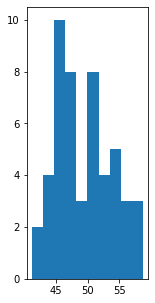

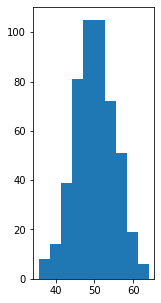

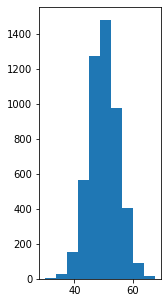

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,4,1)
plt.hist(x)
plt.figure(figsize=(10,5))
plt.subplot(1,4,2)
plt.hist(y)
plt.figure(figsize=(10,5))
plt.subplot(1,4,3)
plt.hist(z)
plt.figure(figsize=(10,5))
plt.subplot(1,4,4)
plt.hist(w)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [6]:
"""
This samples contain many observations, each observation were randomly generated in a way that does 
not depend on the values of the other observations. the central limit theorem says that the distribution 
of the average will be closely approximated by a normal distribution and so we can observe in the plots, 
the bigger the samples we use the easier for us to realize the theorem. thereby we can observe that the 
observations tend to group close to the mean value.
"""

'\nThis samples contain many observations, each observation were randomly generated in a way that does \nnot depend on the values of the other observations. the central limit theorem says that the distribution \nof the average will be closely approximated by a normal distribution and so we can observe in the plots, \nthe bigger the samples we use the easier for us to realize the theorem. thereby we can observe that the \nobservations tend to group close to the mean value.\n'

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

True

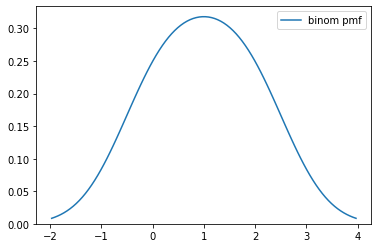

In [17]:
from scipy.stats import binom
import matplotlib.pyplot as plt
n, p = 5, 0.15
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
sns.distplot(x, binom.pmf(x, n, p),"",  label='binom pmf')
prob = binom.cdf(x, n, p)
np.allclose(x, binom.ppf(prob, n, p))

#### Explain what you observe from the plot above

In [ ]:
# Your comment here

#### Now plot PMP with 50, 500, and 5000 visitors.

In [ ]:
# Your code here

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

In [ ]:
# your code here
